In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_train = "dados/mitbih_train.csv"
df_train = pd.read_csv(file_train, header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_train.shape

(87554, 188)

In [4]:
file_test = "dados/mitbih_test.csv"
df_test = pd.read_csv(file_test, header=None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_test.shape

(21892, 188)

In [6]:
CLASSES = {
    0: 'Normal (N)',
    1: 'Supraventricular Prematuro (S)',
    2: 'Ventricular Prematuro (V)',
    3: 'Fusão (F)',
    4: 'Desconhecido (Q)'
}

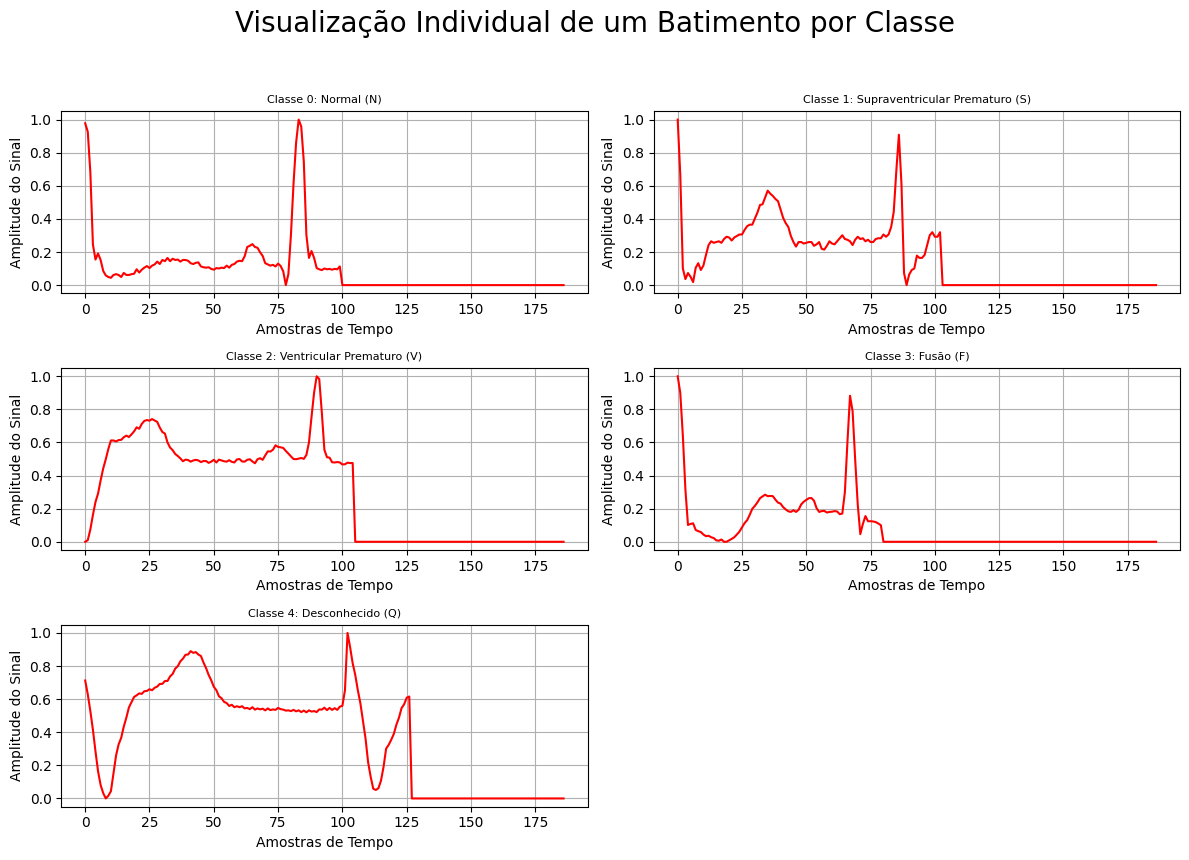

In [11]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
    
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))

axes = axes.flatten()

for i, (codigo_classe, nome_classe) in enumerate(CLASSES.items()):
        
    ax = axes[i]
        
    primeiro_indice = y_train[y_train == codigo_classe].index[0]
    batimento = X_train.iloc[primeiro_indice]
        
       
    ax.plot(batimento, color='red') 
    ax.set_title(f'Classe {codigo_classe}: {nome_classe}', fontsize=8)
    ax.set_xlabel('Amostras de Tempo')
    ax.set_ylabel('Amplitude do Sinal')
    ax.grid(True)

    
for i in range(len(CLASSES), len(axes)):
    fig.delaxes(axes[i])

fig.suptitle('Visualização Individual de um Batimento por Classe', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 

plt.show()

In [8]:
contagem_classes_treino = y_train.value_counts()

print("Contagem de amostras por classe no treino:")
print(contagem_classes_treino)

Contagem de amostras por classe no treino:
187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


In [9]:
y_test = df_test.iloc[:, -1]

contagem_classes_teste = y_test.value_counts()
print("Contagem de amostras por classe no teste:")
print(contagem_classes_teste)

Contagem de amostras por classe no teste:
187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64
